## Import Library ที่ต้องใช้ในการวิจัยข้อมูลราคาบ้าน

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error



## อ่านไฟล์ Dataset

In [2]:
dataset = pd.read_csv("./archive/housing_price_dataset.csv") # read data from csv file
dataset.head() # show header of dataset

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


## Drop Feature Neighborhood ออกเนื่องจากใช้คำนวนตัวเลขไม่ได้

In [3]:
dataset["Neighborhood"] = dataset["Neighborhood"].astype("category").cat.codes

dataset

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065


## แยก features กับ answers

In [4]:
array = dataset.values
X = array[:, :-1] # ทุก row และทุก column ยกเว้น column สุดท้าย จะเป็น features
y = array[:, -1].astype(float) #ทุก row และ column สุดท้าย จะเป็น answers

## ใช้ Tree Regression Model เรียนรู้จากข้อมูล

In [5]:
model = DecisionTreeRegressor(random_state=0, max_depth=4) # สร้าง Object ของ DecisionTreeRegressor
model.fit(X, y) # เรียกใช้ method fit ของ Object เพื่อเริ่มการเรียนรู้

DecisionTreeRegressor(max_depth=4, random_state=0)

## ทดสอบโดยให้ model เดาราคาจากบ้านที่มีพื้นที่ 2200 ตารางฟุต 5 ห้องนอน 3 ห้องน้ำ และถูกสร้างปี 2016

In [7]:
model.predict([[2200, 5, 3, 0, 2016]])

array([246473.97784388])

## แสดงรูปแผนต้นไม้ regression

[Text(0.5, 0.9, 'SquareFeet <= 2024.5\nsquared_error = 5797464298.663\nsamples = 50000\nvalue = 224827.325'),
 Text(0.25, 0.7, 'SquareFeet <= 1502.5\nsquared_error = 3400635590.455\nsamples = 25410\nvalue = 176181.766'),
 Text(0.125, 0.5, 'SquareFeet <= 1230.5\nsquared_error = 2738315075.734\nsamples = 12243\nvalue = 149875.593'),
 Text(0.0625, 0.3, 'SquareFeet <= 1118.5\nsquared_error = 2583116567.101\nsamples = 5612\nvalue = 136457.696'),
 Text(0.03125, 0.1, 'squared_error = 2537832971.773\nsamples = 2908\nvalue = 129330.688'),
 Text(0.09375, 0.1, 'squared_error = 2518442615.891\nsamples = 2704\nvalue = 144122.392'),
 Text(0.1875, 0.3, 'SquareFeet <= 1361.5\nsquared_error = 2588333683.205\nsamples = 6631\nvalue = 161231.533'),
 Text(0.15625, 0.1, 'squared_error = 2544952119.588\nsamples = 3152\nvalue = 154557.67'),
 Text(0.21875, 0.1, 'squared_error = 2550722724.154\nsamples = 3479\nvalue = 167278.103'),
 Text(0.375, 0.5, 'SquareFeet <= 1740.5\nsquared_error = 2774727391.544\nsamples

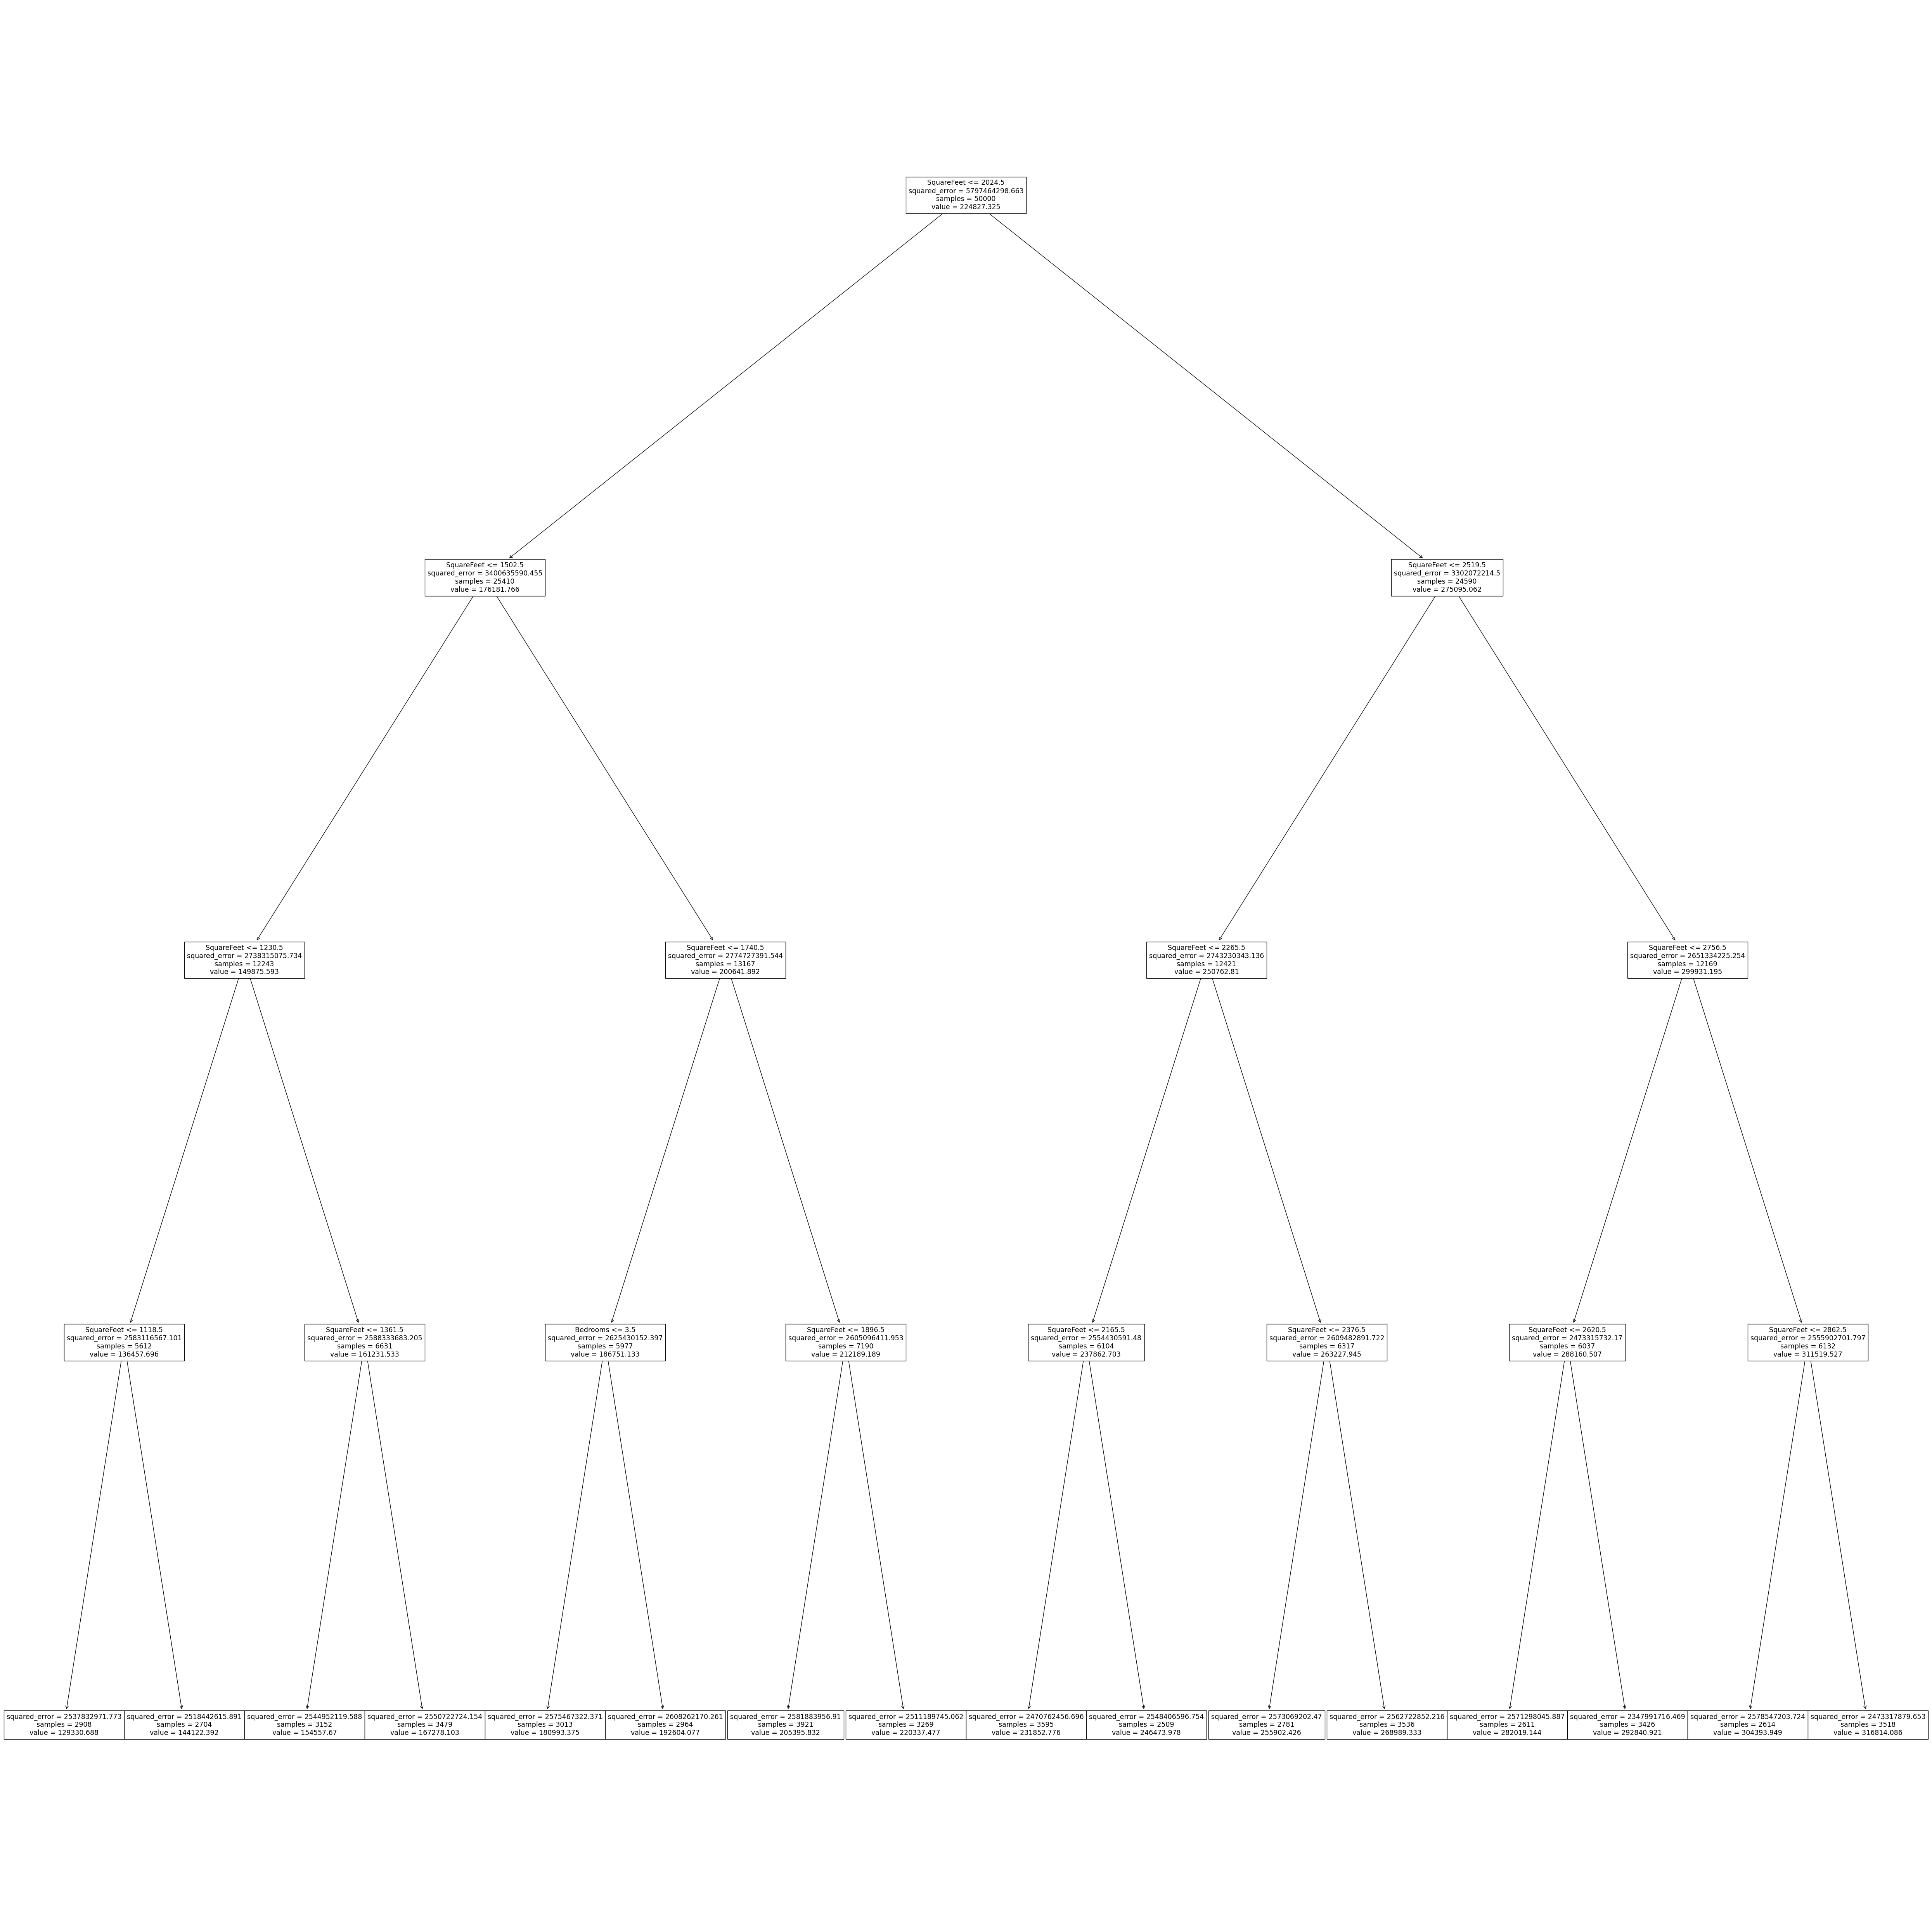

In [ ]:
plt.figure(figsize=(64, 64))
tree.plot_tree(model, feature_names=["SquareFeet","Bedrooms","Bathrooms","YearBuilt"])

## ทดสอบ Model

In [ ]:
test_model = DecisionTreeRegressor(random_state=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

test_model.fit(X_train, y_train)

yhat = model.predict(X_test)

mse = mean_squared_error(y_test, yhat)
print("Mean Squared Error: ", mse)

mae = mean_absolute_error(y_test, yhat)
print("Mean Absolute Error: ", mae)

r = r2_score(y_test, yhat)
print("R squared Error: ", r)

(40000, 4) (10000, 4) (40000,) (10000,)
Mean Squared Error:  2560216483.923198
Mean Absolute Error:  40578.849564391436
R squared Error:  0.5630243360500393
